

**1. Importing Libraries**
   *   `import os`: Imports the `os` module for interacting with the operating system, like file path manipulation.
   *   `import pandas as pd`: Imports the `pandas` library, aliased as `pd`, for data manipulation and analysis, especially for working with DataFrames.
   *   `import numpy as np`: Imports the `numpy` library, aliased as `np`, for numerical operations, especially for array manipulation.
   *  `from scipy.signal import find_peaks`: Imports the `find_peaks` function from the `scipy.signal` module, used for peak detection in the data.
   *  `from scipy.optimize import curve_fit`: Imports the `curve_fit` function from the `scipy.optimize` module, used for fitting curves to data, such as Gaussian fitting of peaks.
   *   `from scipy.ndimage import gaussian_filter1d`: Imports the `gaussian_filter1d` function from `scipy.ndimage` for applying Gaussian smoothing to the data.

**2. Defining the Gaussian Function**
    *   `def gaussian(x, amp, cen, wid):`: Defines a function named `gaussian` that represents a Gaussian curve.
    *   It takes `x` (the independent variable, m/z values), `amp` (amplitude), `cen` (center), and `wid` (width) as parameters.
    *   It returns the calculated Gaussian value for the given x based on the formula `amp * np.exp(-(x - cen) ** 2 / (2 * wid ** 2))`.

**3. Baseline Correction Function**
    *   `def baseline_correction(data, poly_order=3):`: Defines a function named `baseline_correction` that removes baseline shifts from the data.
    *   It takes a DataFrame `data` (with "m/z" and "Intensity" columns) and `poly_order` (default is 3 for polynomial order) as inputs.
    *   It fits a polynomial curve of the specified order to the intensity data using `np.polyfit` and generates a baseline using `np.polyval` which is the fitted curve.
    *   It subtracts the baseline from the original intensity data and stores the result in a new column called "Corrected_Intensity" in the DataFrame.
    *   It returns the modified DataFrame.

**4. Data Smoothing Function**
    *   `def smooth_data(sample, window_size=5):`: Defines a function named `smooth_data` that applies Gaussian smoothing to reduce noise.
    *   It takes a DataFrame `sample` and `window_size` (default is 5 for smoothing) as input.
    *    It uses `gaussian_filter1d` to smooth the intensity data and returns the modified DataFrame, where the 'Intensity' column is now smoothed.

**5. Dynamic Tolerance Function**
    *  `def dynamic_tolerance(sample, peak, fwhm_factor=2):`: Defines a function named `dynamic_tolerance` to calculate tolerance dynamically.
    *  It takes a DataFrame `sample`, a `peak` value, and a `fwhm_factor` (default is 2) as input.
    *  It filters the data to select a region around the specified peak, then calculates the Full Width at Half Maximum (FWHM) by computing the standard deviation of the m/z values in this region and multiplies it by a `fwhm_factor`.
    *  It returns the calculated dynamic tolerance value.

**6. Extract Peak Features Function**
    *   `def extract_peak_features(region, peak_mz):`: Defines a function named `extract_peak_features` to get the features of a specific peak.
    *  It takes a region of the DataFrame `region` (m/z and corrected intensities) and a `peak_mz` (the m/z value of the peak) as input.
    * It fits a Gaussian curve to the intensity data within the region using `curve_fit`. The function also takes initial guesses `p0` for the curve fit (amplitude, center, width), based on max intensity and peak location.
    *  From the fitted Gaussian, it calculates the FWHM and area under the curve, and returns these along with the intensity (amplitude of the fitted gaussian), as a dictionary.
     *  If the Gaussian fit fails, it returns a dictionary with maximum intensity and zero for FWHM and area.

**7. Extract Features Function**
   *   `def extract_features(folder_path, tb_peaks=None, tolerances=None, label=None):`: Defines the main feature extraction function.
    *  It takes the `folder_path` of data files, optional `tb_peaks`, optional `tolerances` (which aren't used in this version as tolerance is dynamic) and a `label` (0 or 1) as input.
    *  It iterates through each file in the specified folder:
        *   Reads the data, applies baseline correction and smoothing using `baseline_correction` and `smooth_data`. It handles file reading errors and skips problematic files.
        *   If `tb_peaks` are not provided, it performs **dynamic peak detection** using the `find_dynamic_peaks` function.
        *   For each identified peak:
            *   It calculates a dynamic tolerance using the `dynamic_tolerance` function based on the peak's FWHM.
            *   Extracts peak features by using `extract_peak_features` for the region around each peak.
            *  Extends the `features` list with the extracted peak features (intensity, FWHM, area).
     *   Appends the label to the `features` list and adds it to the `data` list, which is ultimately used to form the DataFrame of extracted features for all files.
    *   Returns a Pandas DataFrame containing the extracted features and labels.

**8. Dynamic Peak Finding Function**
    *   `def find_dynamic_peaks(sample):`: Defines a function named `find_dynamic_peaks` to identify peaks in the data dynamically.
    *   It takes a DataFrame `sample` as input.
    *   It uses `find_peaks` from `scipy.signal` to identify peaks in the intensity data and returns the m/z values of the detected peaks.

**9. Example Usage**
    *   Sets the `tb_folder` and `non_tb_folder` variables to the paths of the TB and Non-TB data folders.
    *   Calls `extract_features` function to extract features from TB and Non-TB data, with labels 1 and 0 respectively.
    *   Combines the extracted TB and Non-TB data into a single DataFrame using `pd.concat`.
    *   Saves the combined data to a CSV file called "processed_dataset_with_dynamic_tolerances.csv".

In summary, `mtml-3.ipynb` performs advanced processing of mass spectrometry data. It incorporates **baseline correction** and **smoothing** to improve data quality. It identifies peaks using both pre-defined lists and dynamic detection and uses a dynamic tolerance based on each peak's FWHM. The code then extracts peak features (intensity, FWHM, area) by fitting a Gaussian curve and saves the extracted features and their associated labels into a CSV file for further analysis.


**Math behind this code:**

**1. Gaussian Function**

*   The code uses a Gaussian function to model the shape of peaks in the mass spectrometry data. The Gaussian function is defined as:

    $$
    f(x) = amp \cdot e^{-\frac{(x - cen)^2}{2 \cdot wid^2}}
    $$

    Where:
    *   `x` represents the m/z value.
    *  `amp` is the amplitude, representing the height of the peak. This corresponds to the maximum intensity of the peak.
    *   `cen` is the center, representing the m/z value at the center of the peak.
    *   `wid` is the width, which is related to the spread of the peak.  It is the standard deviation of the Gaussian curve.

*   The code fits this Gaussian function to each detected peak to estimate its characteristics like amplitude, center, and width, which provide important information about the peak.

**2. Polynomial Baseline Correction**

*   Baseline correction addresses the issue of background noise or shifts in the baseline of the mass spectrometry data. It does this by fitting a polynomial curve to the data and subtracting it from the original signal. The polynomial is expressed as:

    $$
    p(x) = a_0 + a_1x + a_2x^2 + ... + a_nx^n
    $$

    Where:
    *   `x` represents the m/z values.
    *  `a_0`, `a_1`, `a_2`, ..., `a_n` are the polynomial coefficients that are determined by fitting the curve to the data.
    *   `n` is the `poly_order`, which defaults to 3 in the code.
*   The code uses `numpy.polyfit` to find the best coefficients (`a` values) to fit the polynomial to the m/z and intensity data and `numpy.polyval` to generate the baseline. Subtracting this fitted baseline curve from the original intensity data corrects for baseline drift.

**3. Gaussian Smoothing**

*   Gaussian smoothing reduces random noise in the data by applying a Gaussian filter. The Gaussian filter is a weighted average, where the weights are determined by the Gaussian function. A 1D Gaussian filter is used, and is given by:

    $$
     G(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{x^2}{2\sigma^2}}
    $$

    Where:
    *  `x` is the distance from the center of the filter (in m/z units).
    *  `σ` is the standard deviation, which controls the width of the Gaussian filter. This is set by the `window_size` parameter in the `smooth_data` function.
*   `gaussian_filter1d` function applies this filter to the intensity data and reduces high-frequency noise, making it easier to identify peaks.

**4. Dynamic Tolerance Calculation**

*   Instead of using a fixed tolerance around each peak, the code calculates a dynamic tolerance based on the Full Width at Half Maximum (FWHM) of the peak. The FWHM is related to the width (`wid`) parameter of the Gaussian curve we discussed previously.
*   The standard deviation of the m/z values in a region around the peak is initially calculated. This value is used as an estimate for the standard deviation, and it is multiplied by a factor (`fwhm_factor`, set to 2 by default) to get the FWHM for this peak.
*   The FWHM is used to set the tolerance, providing an adaptive window for peak feature extraction and accounts for variations in the peak width.

**5. Peak Feature Extraction**

*   After determining the dynamic tolerance region, the code extracts specific features of each peak:
    *   **Intensity**: This is the amplitude of the fitted Gaussian curve, which represents the maximum intensity of the peak.
    *   **FWHM**: This is the Full Width at Half Maximum of the fitted Gaussian curve, calculated using the formula:
        $$
        FWHM = 2 \sqrt{2 \ln 2} \cdot wid
        $$
        Where `wid` is the standard deviation of the Gaussian curve from the Gaussian fit.
    *   **Area**: This is the area under the fitted Gaussian curve, calculated using numerical integration with the `trapz` function:
    $$
        Area = \int  Gaussian(x, amp, cen, wid) \, dx
    $$
    The area is computed using `numpy.trapz` method.
* These values (Intensity, FWHM, and area) are then used as features for each peak in the dataset.

**6. Dynamic Peak Detection**

*   If no pre-defined peaks are given, peaks are identified using the `find_peaks` function. This function uses a combination of peak prominence and distance criteria to identify local maxima in the intensity data. It returns the m/z values of these maxima.

In essence, the code uses mathematical functions and algorithms to:

*   **Model Peak Shapes**:  Uses the Gaussian function to approximate the shape of peaks.
*   **Correct Baseline**: Uses polynomial fitting to remove baseline drifts.
*   **Reduce Noise**:  Applies Gaussian smoothing to reduce random fluctuations.
*   **Adapt to Peak Width**:  Calculates dynamic tolerances based on the FWHM of the peaks.
*   **Quantify Peaks**:  Extracts features like intensity, FWHM, and area of the peaks based on the fitted Gaussian curves.

These steps, each grounded in mathematical principles, are crucial for accurate and robust analysis of mass spectrometry data.


In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

# Configuration
tb_folder = "/content/drive/MyDrive/MTML /tb"
non_tb_folder = "/content/drive/MyDrive/MTML /ntm"
tb_peaks = [10660, 10100, 9768, 9813, 7931, 7974]
output_file = "processed_dataset_with_dynamic_tolerance.csv"

def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen) ** 2 / (2 * wid ** 2))

def baseline_correction(data, poly_order=3):
    x = data['m/z']
    y = data['Intensity']
    coeffs = np.polyfit(x, y, poly_order)
    baseline = np.polyval(coeffs, x)
    corrected = y - baseline
    corrected[corrected < 0] = 0  # Clip negative values
    data['Corrected'] = corrected
    return data

def dynamic_tolerance(data, peak_mz, window=50, min_tol=0.5, max_tol=20):
    region = data[(data['m/z'] > peak_mz - window) & (data['m/z'] < peak_mz + window)]
    if region.empty:
        return min_tol
    tol = 2 * region['m/z'].std()
    return np.clip(tol, min_tol, max_tol)

def get_peak_features(data, peak_mz):
    """Extract features without plotting"""
    tol = dynamic_tolerance(data, peak_mz)
    peak_data = data[(data['m/z'] > peak_mz - tol) & (data['m/z'] < peak_mz + tol)]

    if len(peak_data) < 3:
        return {'Intensity': 0, 'FWHM': 0, 'Area': 0}

    x = peak_data['m/z'].values
    y = peak_data['Corrected'].values
    y_smooth = gaussian_filter1d(y, sigma=1)

    try:
        popt, _ = curve_fit(gaussian, x, y,
                          p0=[y_smooth.max(), x[y_smooth.argmax()], 1],
                          bounds=([0, x.min(), 0], [np.inf, x.max(), np.inf]))
        amp, cen, wid = popt
        fwhm = 2.355 * wid
        area = np.trapz(y, x)
    except:
        amp = y.max()
        fwhm = 0
        area = 0

    return {'Intensity': amp, 'FWHM': fwhm, 'Area': area}

def process_folder(folder_path, peaks, label):
    """Process all files in a folder"""
    data = []

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        try:
            # Load and process data
            df = pd.read_csv(file_path, sep='\s+', header=None, names=["m/z", "Intensity"])
            df = baseline_correction(df)

            # Extract features for all peaks
            features = []
            for peak in peaks:
                peak_features = get_peak_features(df, peak)
                features.extend([peak_features['Intensity'],
                               peak_features['FWHM'],
                               peak_features['Area']])

            # Add label and store
            features.append(label)
            data.append(features)

        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue

    # Create feature names
    feature_names = []
    for peak in peaks:
        feature_names.extend([f'Intensity_{peak}', f'FWHM_{peak}', f'Area_{peak}'])
    feature_names.append('Label')

    return pd.DataFrame(data, columns=feature_names)

# Process both folders
print("Processing TB samples...")
tb_df = process_folder(tb_folder, tb_peaks, label=1)

print("\nProcessing non-TB samples...")
ntm_df = process_folder(non_tb_folder, tb_peaks, label=0)

# Combine and save
combined_df = pd.concat([tb_df, ntm_df], ignore_index=True)
combined_df.to_csv(output_file, index=False)
print(f"\nDataset saved to {output_file} with {len(combined_df)} samples")

Processing TB samples...

Processing non-TB samples...

Dataset saved to processed_dataset_with_dynamic_tolerance.csv with 1164 samples


In [ ]:
def visualize_real_tolerance(sharp_peak_path, broad_peak_path):
    # Create figure
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Process and plot both samples
    for idx, (file_path, peak_type) in enumerate(zip(
        [sharp_peak_path, broad_peak_path],
        ['Sharp Peak', 'Broad Peak']
    )):
        # Load and process data
        df = pd.read_csv(file_path, sep='\s+', header=None,
                       names=["m/z", "Intensity"])
        df = baseline_correction(df)

        # Find dominant peak near center
        main_peak = df.loc[df['Corrected'].idxmax(), 'm/z']
        tol = dynamic_tolerance(df, main_peak)

        # Full spectrum plot
        axs[idx].plot(df['m/z'], df['Corrected'], 'k-', label='Full Spectrum')
        axs[idx].axvspan(main_peak - tol, main_peak + tol,
                        color='orange', alpha=0.3,
                        label=f'Tolerance: ±{tol:.1f}')

        # Peak region analysis
        peak_df = df[(df['m/z'] > main_peak - tol) &
                   (df['m/z'] < main_peak + tol)].copy()
        x = peak_df['m/z'].values
        y = peak_df['Corrected'].values

        # Gaussian fit
        try:
            y_smooth = gaussian_filter1d(y, sigma=1)
            popt, _ = curve_fit(gaussian, x, y,
                              p0=[y_smooth.max(), x.mean(), 1],
                              bounds=([0, x.min(), 0], [np.inf, x.max(), np.inf]))
            fwhm = 2.355 * popt[2]
            area = np.trapz(y, x)
            fit_success = True
        except:
            fwhm, area = 0, 0
            fit_success = False

        # Add text annotations on left side
        text_x = 0.05  # 5% from left edge
        text_y = 0.85  # 85% from bottom
        text = f"FWHM: {fwhm:.1f}\nArea: {area:.1f}"
        axs[idx].text(text_x, text_y, text,
                    transform=axs[idx].transAxes,
                    verticalalignment='top',
                    bbox=dict(facecolor='white', alpha=0.8))

        # Add inset for peak zoom on right side
        ax_inset = axs[idx].inset_axes([0.55, 0.55, 0.4, 0.4])
        ax_inset.plot(x, y, 'bo', markersize=3)
        if fit_success:
            ax_inset.plot(x, gaussian(x, *popt), 'r-')
        ax_inset.set_title("Peak Region Zoom")
        ax_inset.grid(alpha=0.3)

        # Main plot decorations
        axs[idx].set_title(f"{peak_type} Example\nm/z: {main_peak:.1f}")
        axs[idx].set_xlabel('m/z')
        axs[idx].set_ylabel('Corrected Intensity')
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

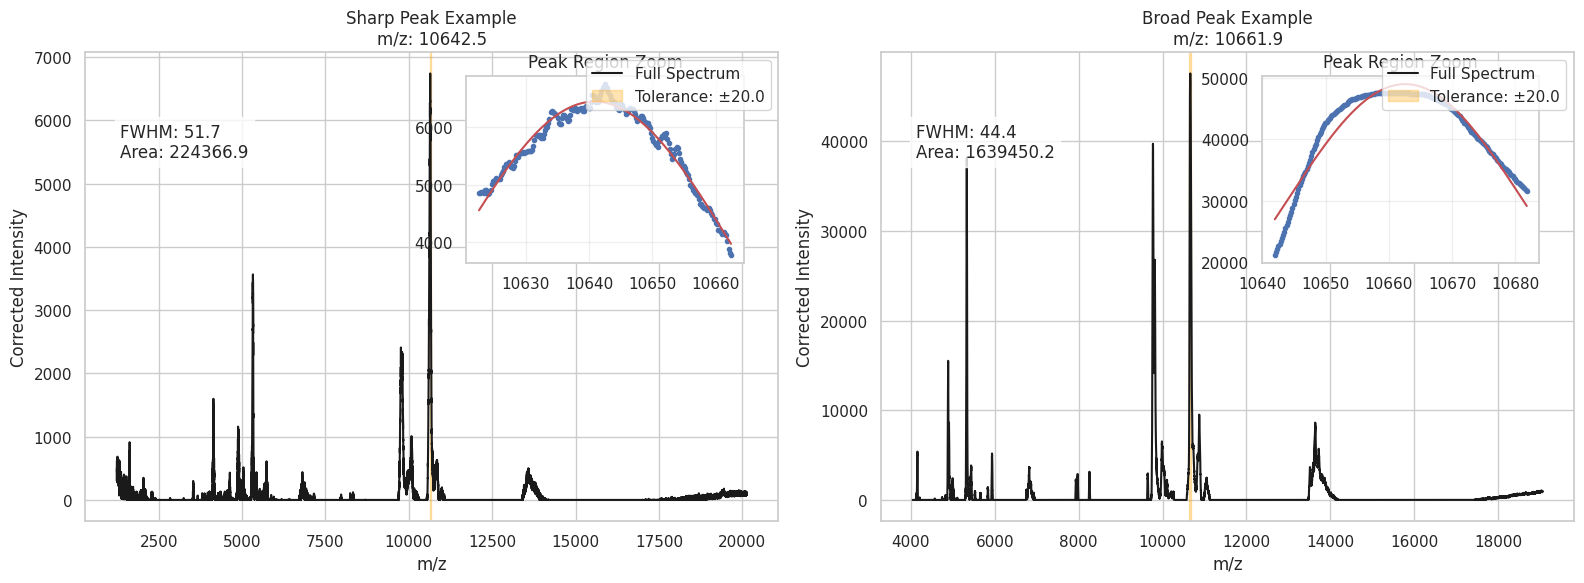

In [ ]:
# Usage - replace paths with your actual files
visualize_real_tolerance(
    sharp_peak_path="/content/1-BLACK-TB-13(50uL)+ND(50uL)+BUFFER(100uL)+200SHOTS+50%SLI+45%_0_B2_1.txt",
    broad_peak_path="/content/5nm DND 55892 TB 3mg SA 100ul 0.1%TFA 40% 46% 200ul ESAT-6 remove -1_0_G5_1.txt")

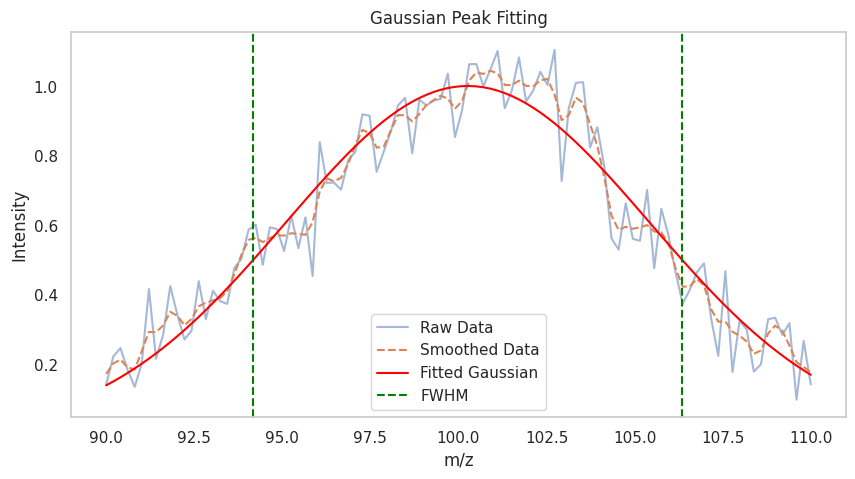

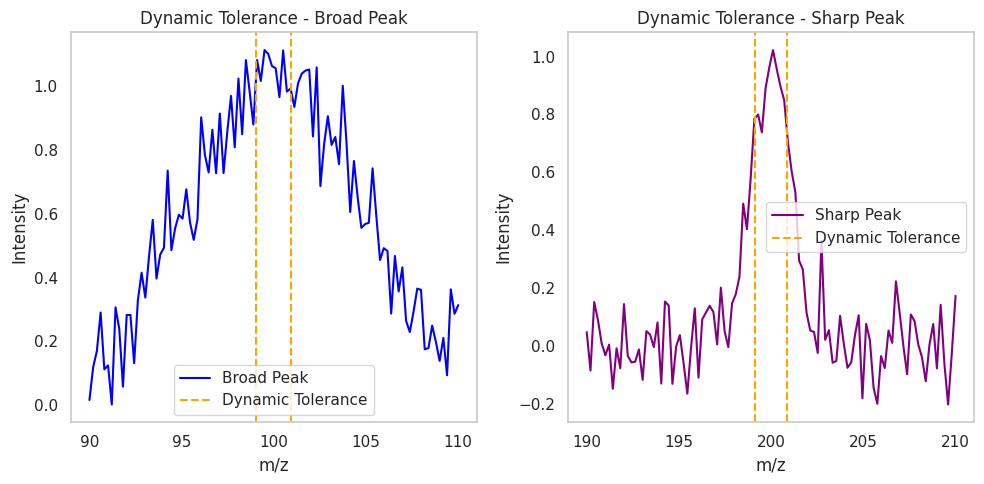

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

# Gaussian function for peak fitting
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen) ** 2 / (2 * wid ** 2))

# Generate synthetic data for demonstration
def generate_synthetic_data(peak_center, peak_width, noise_level=0.1, num_points=100):
    x = np.linspace(peak_center - 10, peak_center + 10, num_points)
    y = gaussian(x, amp=1, cen=peak_center, wid=peak_width) + np.random.normal(0, noise_level, num_points)
    return x, y

# Plot Gaussian fitting
def plot_gaussian_fit(x, y, peak_center, peak_width):
    # Smooth the data
    y_smoothed = gaussian_filter1d(y, sigma=1)

    # Fit Gaussian
    initial_guess = [y_smoothed.max(), peak_center, peak_width]
    try:
        popt, _ = curve_fit(gaussian, x, y_smoothed, p0=initial_guess)
        fitted_y = gaussian(x, *popt)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.plot(x, y, label='Raw Data', alpha=0.5)
        plt.plot(x, y_smoothed, label='Smoothed Data', linestyle='--')
        plt.plot(x, fitted_y, label='Fitted Gaussian', color='red')

        # Highlight FWHM
        fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]
        plt.axvline(popt[1] - fwhm / 2, color='green', linestyle='--', label='FWHM')
        plt.axvline(popt[1] + fwhm / 2, color='green', linestyle='--')

        plt.title('Gaussian Peak Fitting')
        plt.xlabel('m/z')
        plt.ylabel('Intensity')
        plt.legend()
        plt.grid()
        plt.show()
    except Exception as e:
        print(f"Error in fitting: {e}")

# Plot dynamic tolerance
def plot_dynamic_tolerance():
    # Generate synthetic data for broad and sharp peaks
    x_broad, y_broad = generate_synthetic_data(100, 5, noise_level=0.1)
    x_sharp, y_sharp = generate_synthetic_data(200, 1, noise_level=0.1)

    # Calculate dynamic tolerance
    tol_broad = 3 * np.std(y_broad)
    tol_sharp = 3 * np.std(y_sharp)

    # Plotting
    plt.figure(figsize=(10, 5))

    # Broad peak
    plt.subplot(1, 2, 1)
    plt.plot(x_broad, y_broad, label='Broad Peak', color='blue')
    plt.axvline(100 - tol_broad, color='orange', linestyle='--', label='Dynamic Tolerance')
    plt.axvline(100 + tol_broad, color='orange', linestyle='--')
    plt.title('Dynamic Tolerance - Broad Peak')
    plt.xlabel('m/z')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid()

    # Sharp peak
    plt.subplot(1, 2, 2)
    plt.plot(x_sharp, y_sharp, label='Sharp Peak', color='purple')
    plt.axvline(200 - tol_sharp, color='orange', linestyle='--', label='Dynamic Tolerance')
    plt.axvline(200 + tol_sharp, color='orange', linestyle='--')
    plt.title('Dynamic Tolerance - Sharp Peak')
    plt.xlabel('m/z')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Generate and plot Gaussian fit
x, y = generate_synthetic_data(100, 5)
plot_gaussian_fit(x, y, peak_center=100, peak_width=5)

# Plot dynamic tolerance
plot_dynamic_tolerance()

In [ ]:
import pandas as pd

# Load the processed dataset
data = pd.read_csv("processed_dataset_with_dynamic_tolerance.csv")

# Check the first few rows to ensure it loaded correctly
print(data.head())

   Intensity_10660  FWHM_10660    Area_10660  Intensity_10100  FWHM_10100  \
0      6545.365147   51.953458  1.682486e+05       894.393420   48.777649   
1      3040.098570   27.460439  7.691202e+04        25.081778    9.544552   
2     11069.356690   46.504506  2.663778e+05      6562.535968   54.416825   
3     49429.671167   42.070710  1.614761e+06      2100.173125   32.062929   
4      2089.097594   28.680230  3.584954e+04      1052.047839   50.163042   

      Area_10100  Intensity_9768  FWHM_9768     Area_9768  Intensity_9813  \
0   24749.639778     2221.220555  72.653934  8.200890e+04     2226.211792   
1     252.996625     1523.510468  27.600246  4.027957e+04      761.563324   
2  175607.658577     5996.995637  46.542573  1.446947e+05    47871.061360   
3   60709.534755    39517.863557  28.511051  1.059204e+06    24998.908875   
4   27055.542801     1800.775678  14.314193  1.658192e+04    18320.118444   

   FWHM_9813     Area_9813  Intensity_7931  FWHM_7931     Area_7931  \
0  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(columns=['Label'])  # Features (intensity columns)
y = data['Label']  # Target variable (Label column)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import joblib

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# Check the scaled data (optional)
print(pd.DataFrame(X_scaled).head())

         0         1         2         3         4         5         6   \
0  0.058188  0.681140  0.064230 -0.278717 -0.045336 -0.250751 -0.078022   
1 -0.282830  0.041005 -0.262155 -0.411056 -0.049038 -0.397154 -0.188509   
2  0.498315  0.538729  0.414888  0.584170 -0.044804  0.650842  0.519893   
3  4.230288  0.422850  5.233243 -0.095156 -0.046913 -0.035839  5.828114   
4 -0.375350  0.072885 -0.408889 -0.254716 -0.045205 -0.236970 -0.144602   

         7         8         9         10        11        12        13  \
0 -0.034248  0.082585 -0.040712 -0.050981  0.005193 -0.338532 -0.079660   
1 -0.038088 -0.176572 -0.282503 -0.053129 -0.285193 -0.326010 -0.079048   
2 -0.036474  0.471890  7.494565 -0.052202  8.323439 -0.348382 -0.079570   
3 -0.038010  6.151375  3.718717 -0.052649  3.875625  0.626799 -0.078985   
4 -0.039220 -0.323744  2.616149 -0.053396  2.203594 -0.348382 -0.079570   

         14        15        16        17  
0 -0.327645 -0.328667 -0.048682 -0.338112  
1 -0.31593

In [ ]:
# Initialize and fit PCA
pca = PCA(n_components=2)  # We'll visualize first 2 components
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
pca_df['Label'] = y

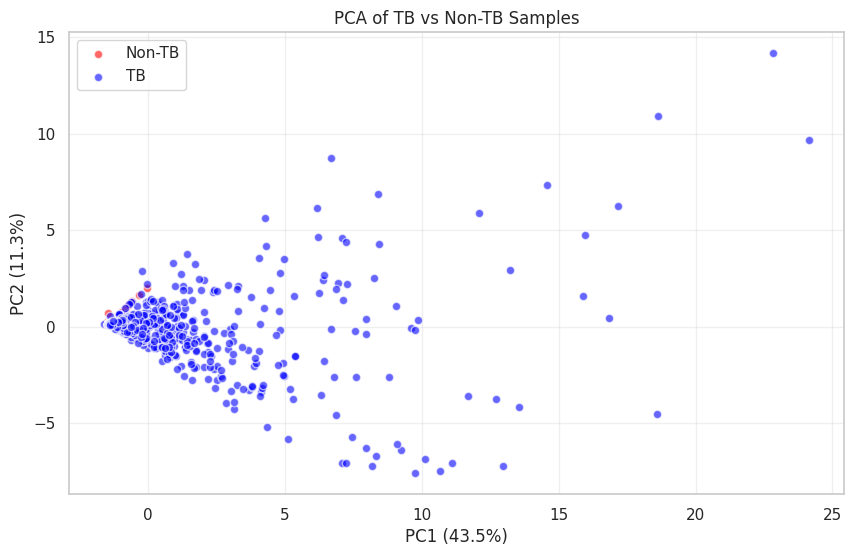

In [ ]:
plt.figure(figsize=(10, 6))
for label, color in [(0, 'red'), (1, 'blue')]:
    mask = pca_df['Label'] == label
    plt.scatter(pca_df.loc[mask, 'PC1'],
               pca_df.loc[mask, 'PC2'],
               c=color,
               label='TB' if label else 'Non-TB',
               alpha=0.6,
               edgecolors='w')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('PCA of TB vs Non-TB Samples')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Get feature loadings
loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2'],
                       index=X.columns)

# Show top 5 features influencing each component
print("Top features for PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(5))
print("\nTop features for PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

Top features for PC1:
Area_10660         0.312052
Intensity_10660    0.305077
Intensity_9768     0.304030
Area_9768          0.303150
Intensity_9813     0.294172
Name: PC1, dtype: float64

Top features for PC2:
Area_7974         0.399024
Area_7931         0.391873
Intensity_7931    0.370422
Intensity_7974    0.367102
Area_9813         0.311554
Name: PC2, dtype: float64


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import shap
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
data = pd.read_csv("processed_dataset_with_dynamic_tolerance.csv")
X = data.drop(columns=["Label"])
y = data["Label"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
# RFE with AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
rfe = RFECV(estimator=ada, step=1, cv=10, scoring='accuracy')
X_train_rfe = rfe.fit_transform(X_train_sm, y_train_sm)
X_test_rfe = rfe.transform(X_test)

In [ ]:
# RFE with RandomForest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rfe = RFECV(estimator=rf, step=1, cv=10, scoring='accuracy')
X_train_rfe = rfe.fit_transform(X_train_sm, y_train_sm)
X_test_rfe = rfe.transform(X_test)

In [ ]:
# RFE with XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
rfe = RFECV(estimator=xgb, step=1, cv=10, scoring='accuracy')

<ipython-input-47-f50b02a096f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train, palette='coolwarm')


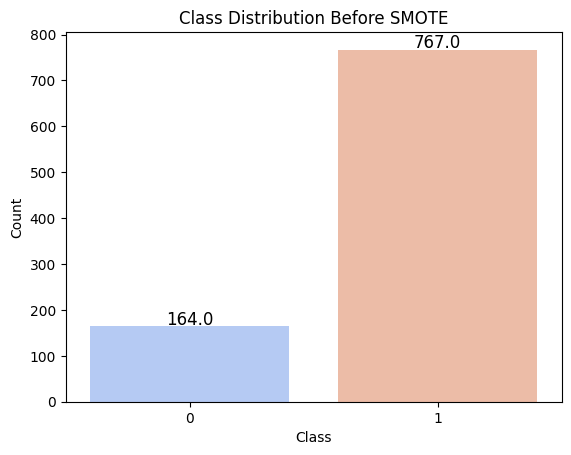

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before SMOTE
ax = sns.countplot(x=y_train, palette='coolwarm')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd

print(y_train.value_counts())  # Displays class counts


Label
1    767
0    164
Name: count, dtype: int64


<ipython-input-49-9822d36c729f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train_sm, palette='coolwarm')


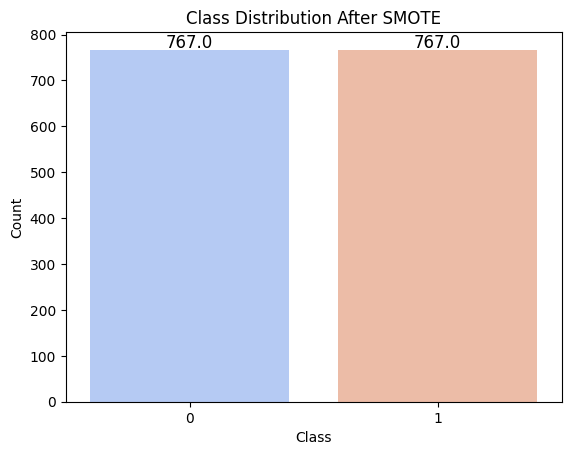

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution after SMOTE
ax = sns.countplot(x=y_train_sm, palette='coolwarm')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Step 1: Train the models and save results to CSV
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=0, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "LDA": LinearDiscriminantAnalysis()
}

# Initialize results dictionary
all_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "AUC": []
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_rfe, y_train_sm)
    y_pred = model.predict(X_test_rfe)
    y_prob = model.predict_proba(X_test_rfe)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Append results to the dictionary
    all_results["Model"].append(name)
    all_results["Accuracy"].append(accuracy)
    all_results["Precision"].append(precision)
    all_results["Recall"].append(recall)
    all_results["F1-Score"].append(f1)
    all_results["AUC"].append(auc)

# Convert to DataFrame
all_results_df = pd.DataFrame(all_results)

# Save to CSV
all_results_df.to_csv("model_initial_results.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 767, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1534, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, average_precision_score
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_predict

# Initialize results dictionaries for storing mean and standard deviation of metrics
cv_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "AUC": [],
    "AUPRC": [],  # Added AUPRC here
    "RMSE": [],
    "R²": [],
    "Composite Score": []
}

for name, model in models.items():
    # Perform 10-fold CV and calculate metrics for each fold
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']  # Added 'average_precision' for AUPRC
    cv_scores = cross_validate(model, X_train_rfe, y_train_sm, cv=10, scoring=scoring, return_train_score=False, n_jobs=-1)

    # Calculate mean and standard deviation for each metric
    accuracy_cv_mean = np.mean(cv_scores['test_accuracy'])
    accuracy_cv_std = np.std(cv_scores['test_accuracy'])

    precision_cv_mean = np.mean(cv_scores['test_precision'])
    precision_cv_std = np.std(cv_scores['test_precision'])

    recall_cv_mean = np.mean(cv_scores['test_recall'])
    recall_cv_std = np.std(cv_scores['test_recall'])

    f1_cv_mean = np.mean(cv_scores['test_f1'])
    f1_cv_std = np.std(cv_scores['test_f1'])

    auc_cv_mean = np.mean(cv_scores['test_roc_auc'])
    auc_cv_std = np.std(cv_scores['test_roc_auc'])

    # Calculate AUPRC (Area Under Precision-Recall Curve)
    auprc_cv_mean = np.mean(cv_scores['test_average_precision'])  # AUPRC mean
    auprc_cv_std = np.std(cv_scores['test_average_precision'])  # AUPRC std

    # Predictions for RMSE and R² calculation (using cross_val_predict)
    y_pred_cv = cross_val_predict(model, X_train_rfe, y_train_sm, cv=10)

    # Calculate RMSE
    rmse_mean = np.sqrt(mean_squared_error(y_train_sm, y_pred_cv))
    rmse_std = np.std(rmse_mean)

    # Calculate R²
    r_squared_mean = r2_score(y_train_sm, y_pred_cv)
    r_squared_std = np.std(r_squared_mean)

    # Calculate composite score (mean of all metrics)
    composite_score = np.mean([accuracy_cv_mean, precision_cv_mean, recall_cv_mean, f1_cv_mean, auc_cv_mean, auprc_cv_mean, rmse_mean, r_squared_mean])

    # Append results with mean ± std values
    cv_results["Model"].append(name)
    cv_results["Accuracy"].append(f"{accuracy_cv_mean:.4f} ± {accuracy_cv_std:.4f}")
    cv_results["Precision"].append(f"{precision_cv_mean:.4f} ± {precision_cv_std:.4f}")
    cv_results["Recall"].append(f"{recall_cv_mean:.4f} ± {recall_cv_std:.4f}")
    cv_results["F1-Score"].append(f"{f1_cv_mean:.4f} ± {f1_cv_std:.4f}")
    cv_results["AUC"].append(f"{auc_cv_mean:.4f} ± {auc_cv_std:.4f}")
    cv_results["AUPRC"].append(f"{auprc_cv_mean:.4f} ± {auprc_cv_std:.4f}")  # Added AUPRC
    cv_results["RMSE"].append(f"{rmse_mean:.4f} ± {rmse_std:.4f}")
    cv_results["R²"].append(f"{r_squared_mean:.4f} ± {r_squared_std:.4f}")
    cv_results["Composite Score"].append(composite_score)

# Convert to DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Rank models based on composite score
cv_results_df['Rank'] = cv_results_df['Composite Score'].rank(ascending=False)

# Save to CSV
cv_results_df.to_csv("model_cv_results_with_composite_score_rmse_r2_auprc.csv", index=False)

# Display the results with the ranking
print(cv_results_df.sort_values(by="Rank"))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 690, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1380, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 690

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 690, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1380, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 691, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 691, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1381, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500362 -> initscore=0.001448
[LightGBM] [Info] Start training from score 0.001448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 690, number of negative: 691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1381, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499638 -> initscore=-0.001448
[LightGBM] [Info] Start training from score -0.001448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 690, number of negative: 691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1381, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499638 -> initscore=-0.001448
[LightGBM] [Info] Start training from score -0.001448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analys

                      Model         Accuracy        Precision  \
13                 LightGBM  0.9889 ± 0.0083  0.9948 ± 0.0086   
3                  CatBoost  0.9889 ± 0.0088  0.9973 ± 0.0054   
0             Random Forest  0.9876 ± 0.0090  0.9935 ± 0.0087   
8                   XGBoost  0.9870 ± 0.0087  0.9922 ± 0.0118   
12               ExtraTrees  0.9863 ± 0.0080  0.9934 ± 0.0066   
7         Gradient Boosting  0.9863 ± 0.0090  0.9947 ± 0.0065   
5             Decision Tree  0.9830 ± 0.0106  0.9884 ± 0.0144   
6                  AdaBoost  0.9778 ± 0.0121  0.9880 ± 0.0094   
15                      QDA  0.9648 ± 0.0155  0.9766 ± 0.0236   
4                       KNN  0.9498 ± 0.0185  0.9833 ± 0.0136   
9    Naive Bayes (Gaussian)  0.9433 ± 0.0138  0.9820 ± 0.0173   
11     Neural Network (MLP)  0.9341 ± 0.0208  0.9884 ± 0.0105   
1                       SVM  0.9218 ± 0.0261  0.9850 ± 0.0134   
2       Logistic Regression  0.9191 ± 0.0250  0.9850 ± 0.0135   
16                      L

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 767, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 1534, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


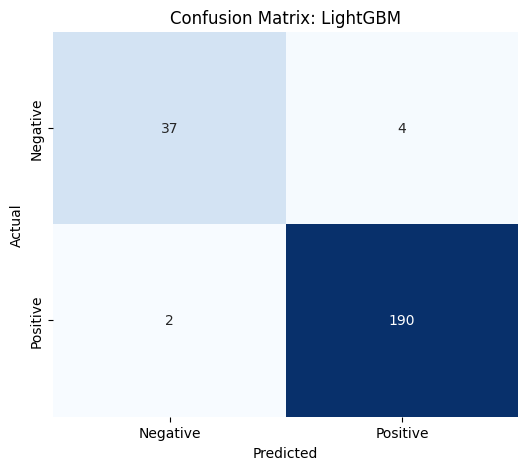

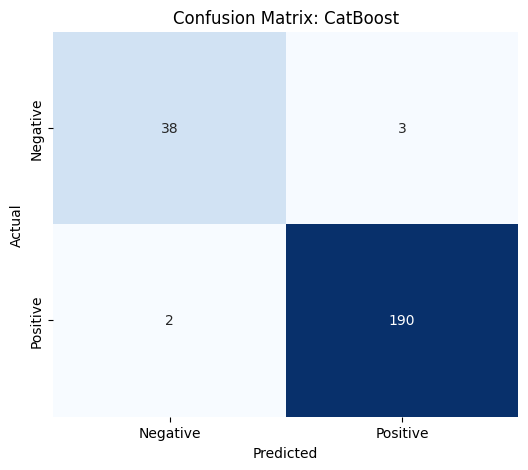

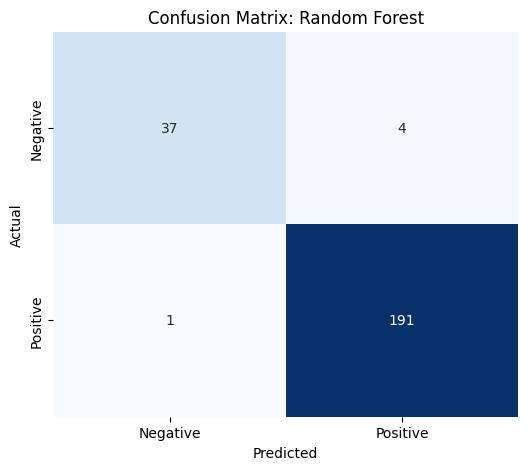

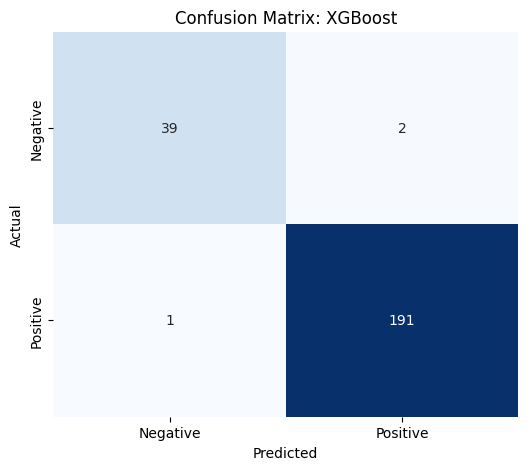

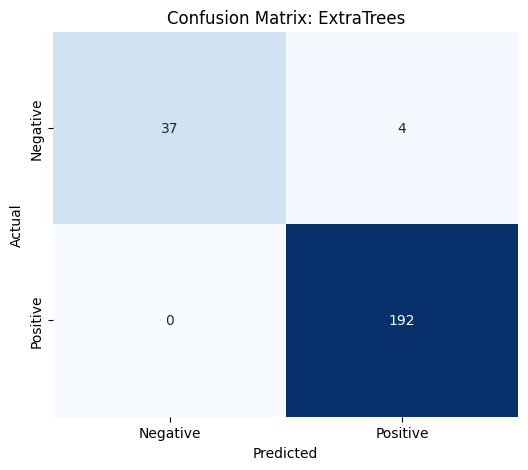

Confusion Matrices for Top Models:

LightGBM:
[[ 37   4]
 [  2 190]]

CatBoost:
[[ 38   3]
 [  2 190]]

Random Forest:
[[ 37   4]
 [  1 191]]

XGBoost:
[[ 39   2]
 [  1 191]]

ExtraTrees:
[[ 37   4]
 [  0 192]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 2 models based on the rank
top_models = cv_results_df.sort_values(by="Rank").head(5)['Model'].values

# Initialize a dictionary to store the confusion matrices
conf_matrices = {}

# Iterate through top 2 models
for model_name in top_models:
    # Get the model corresponding to the name
    model = models[model_name]

    # Train the model on the full training data
    model.fit(X_train_rfe, y_train_sm)

    # Predict on the test data
    y_pred = model.predict(X_test_rfe)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Store the confusion matrix in the dictionary
    conf_matrices[model_name] = cm

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Optionally, you can return or print the confusion matrices
print("Confusion Matrices for Top Models:")
for model_name, cm in conf_matrices.items():
    print(f"\n{model_name}:")
    print(cm)


<ipython-input-54-89a931430661>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Composite Score", y="Model", data=cv_results_df_sorted, palette="viridis")


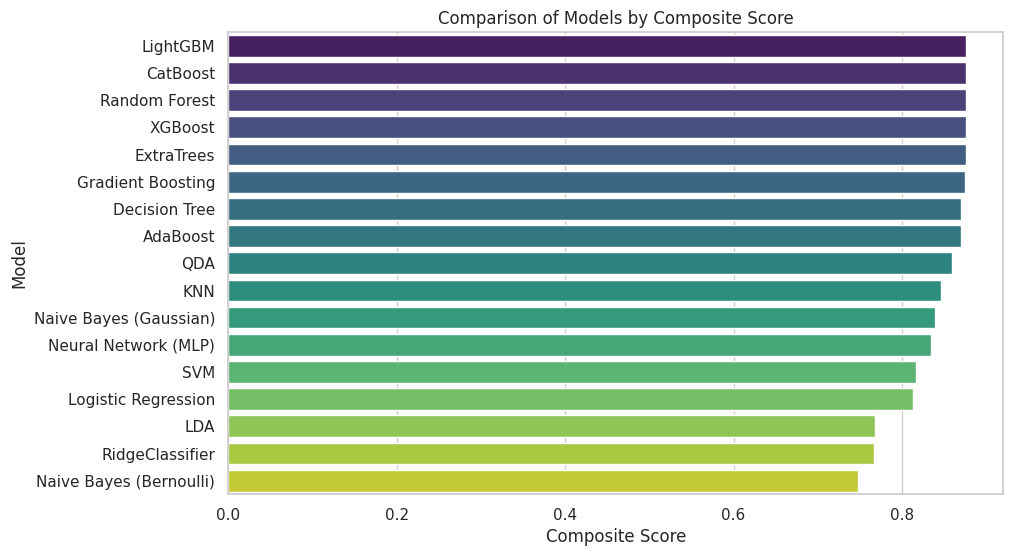

<ipython-input-54-89a931430661>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_values = cv_results_df[metrics].applymap(lambda x: float(x.split(' ± ')[0]))  # Convert to float


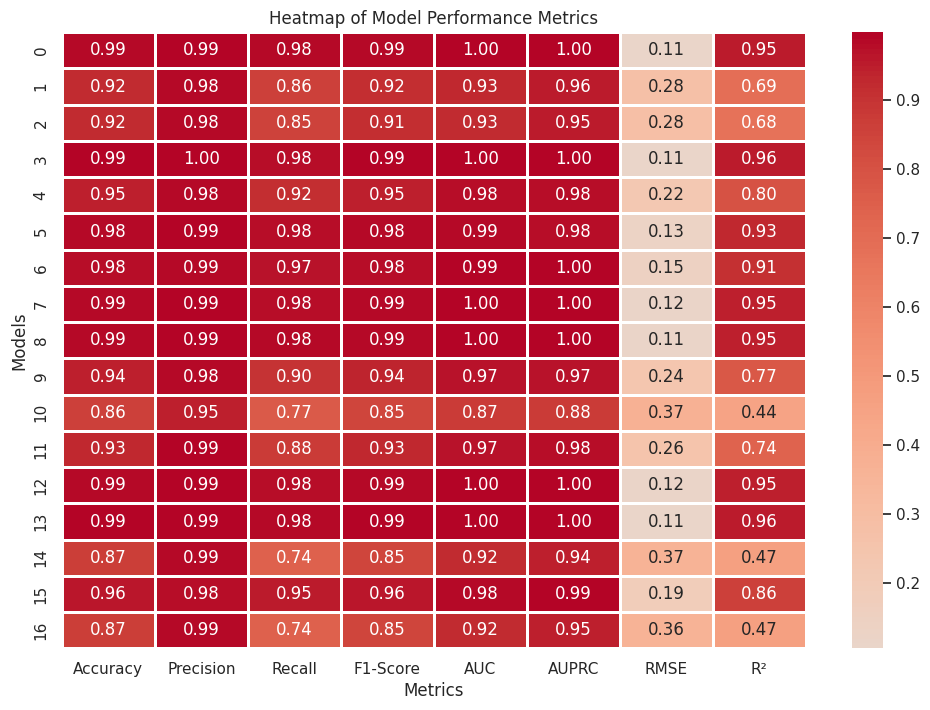

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Sort the dataframe by "Composite Score" in descending order
cv_results_df_sorted = cv_results_df.sort_values(by="Composite Score", ascending=False)

# Plot 1: Bar Plot of Composite Score
plt.figure(figsize=(10, 6))
sns.barplot(x="Composite Score", y="Model", data=cv_results_df_sorted, palette="viridis")
plt.title("Comparison of Models by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Model")
plt.show()


# Plot 2: Heatmap of the Metrics for Models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'AUPRC', 'RMSE', 'R²']
# Extracting only the relevant columns for the heatmap
metrics_values = cv_results_df[metrics].applymap(lambda x: float(x.split(' ± ')[0]))  # Convert to float
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_values, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=1)
plt.title("Heatmap of Model Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()

In [ ]:
print(X.shape, y.shape)


(1164, 18) (1164,)


In [ ]:
from sklearn.model_selection import train_test_split
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 931, Test size: 233


  0%|          | 0/100 [00:00<?, ?it/s]

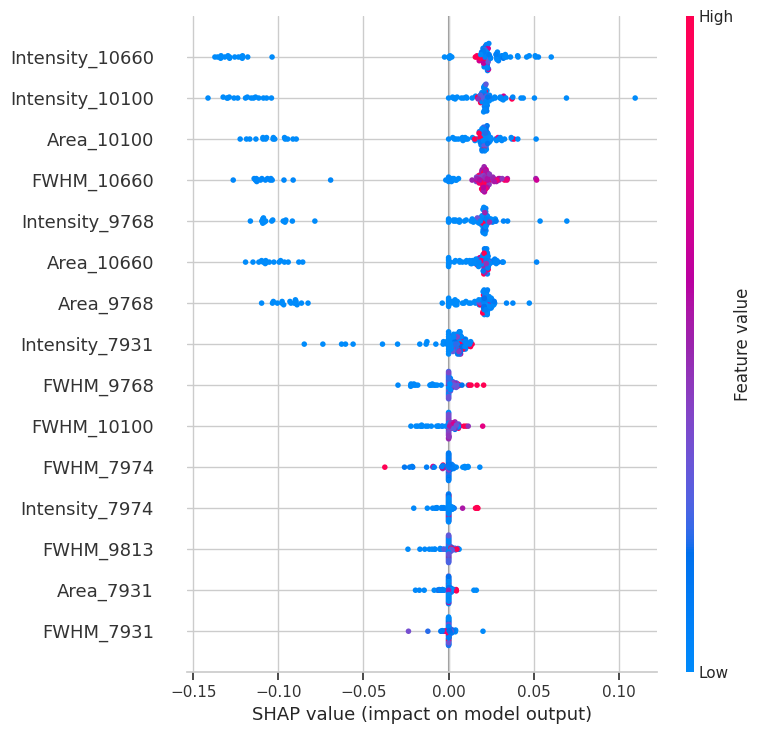

In [ ]:
import shap

# Use the trained ExtraTrees model for SHAP explanation
explainer_et = shap.KernelExplainer(models["ExtraTrees"].predict, X_train_rfe[:100])  # Sample for efficiency
shap_values_et = explainer_et.shap_values(X_test_rfe[:100])

# SHAP Summary Plot for ExtraTrees
shap.summary_plot(shap_values_et, X_test_rfe[:100], feature_names=[X.columns[i] for i in range(len(X.columns)) if rfe.support_[i]])


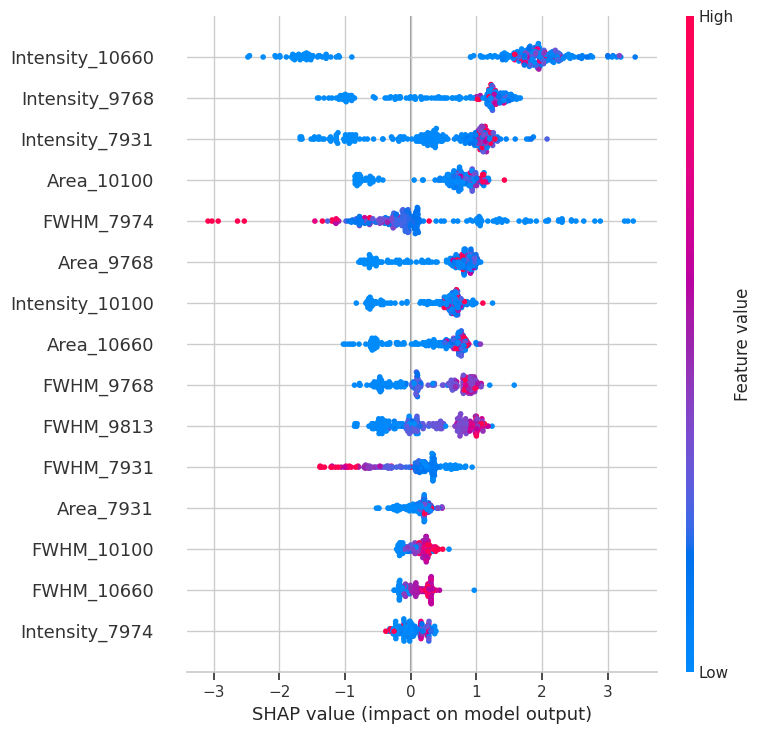

In [ ]:
import shap

# Use the trained CatBoost model for SHAP explanation
explainer_cb = shap.TreeExplainer(models["CatBoost"])  # Assuming "models" dictionary stores your trained CatBoost model
shap_values_cb = explainer_cb.shap_values(X_test_rfe)

# SHAP Summary Plot for CatBoost
shap.summary_plot(shap_values_cb, X_test_rfe, feature_names=[X.columns[i] for i in range(len(X.columns)) if rfe.support_[i]])
